In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
red=pd.read_csv('winequality-red.csv',sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
X=red.drop(columns=['quality'])
y=red['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## PCA

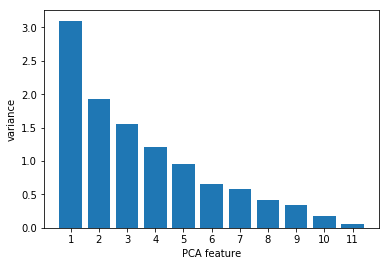

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create scaler: scaler - standard works better here.
scaler = StandardScaler()
#scaler = Normalizer()

# Create PCA instance: model
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(1,pca.n_components_+1)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

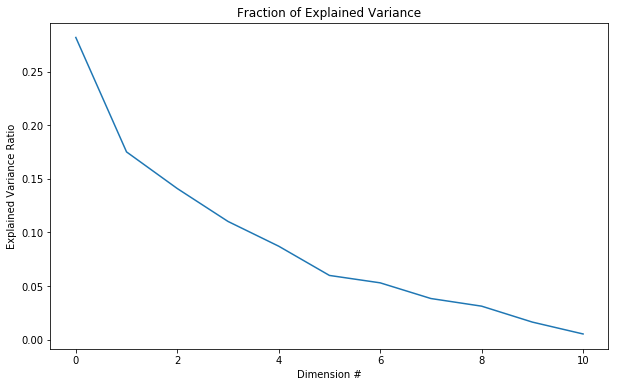

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

# Decorate the plot
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax.plot(pca.explained_variance_ratio_)

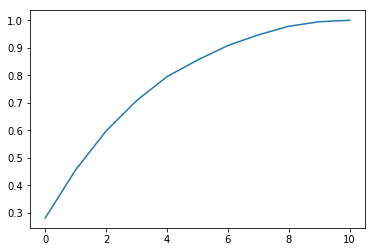

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [9]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9))
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.95))

(array([ 6,  7,  8,  9, 10]),)
(array([ 8,  9, 10]),)


7 features explains more than 90%, 9 expalins more than 95%. 

In [10]:
npc = 8
pca = PCA(n_components=npc, copy=True)
X_standardized=scaler.fit_transform(X)
X_transformed = pca.fit_transform(X_standardized)

In [11]:
y.unique()

array([5, 6, 7, 4, 8, 3])

visualize it on 2 dimensians 

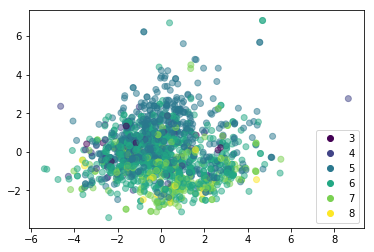

In [15]:
pca_df=pd.DataFrame(X_transformed)

labels = np.unique(y)
scatter = plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=y, label=y,alpha=0.5)

handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

## Kmeans clustering

In [13]:
y.unique()

array([5, 6, 7, 4, 8, 3])

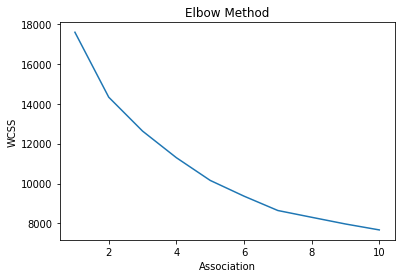

In [45]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [46]:
# elbow point is about 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_transformed)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7  8
labels                         
0        7  31  281  175  21  0
1        2   4   88  133  54  5
2        0   2   20  115  83  9
3        0   1   16   12   5  0
4        0  10   35  103  25  4
5        1   4  224   91  10  0
6        0   1   17    9   1  0


In [47]:
# using 6 clusters instead (same as the number of quality classes showing in the dataset)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7   8
labels                          
0        0   1   18    9   1   0
1        7  36  281  184  23   0
2        0   4   42  161  82  10
3        0   1   28   12   5   0
4        1   7  216   98  11   1
5        2   4   96  174  77   7


In [48]:
red['clusters']=labels

In [49]:
red_grouped = red.groupby('clusters').mean()
print(red_grouped)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
clusters                                                                 
0              8.462069          0.531034     0.493793        1.975862   
1              7.477024          0.651215     0.108644        2.271846   
2              7.144147          0.446923     0.248094        2.182274   
3              7.991304          0.518587     0.348913        8.521739   
4              8.199701          0.535329     0.282096        2.391168   
5             10.680556          0.406958     0.491194        2.646528   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clusters                                                                   
0          0.351172            15.137931             62.068966  0.997097   
1          0.084595            11.481168             32.854991  0.996627   
2          0.068013            16.757525             38.304348  0.994391   
3          0.097174        

the predicted labels does not represent the quality well, but can be used for recommendation. 
for example, cluster 5 hasthe highest fixed acidity, cluster 1 has the lowest citric acid. 

In [50]:
red[red['clusters']==5].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tier,clusters
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,5
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.9969,3.25,0.58,9.5,5,2,5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6,5,2,5
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5,2,5
76,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5,2,5


## content based recommendation

In [26]:
import pandas as pd
#from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df=pd.read_csv('red_wine_with_review.csv')

In [20]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"This terroir-driven Pinot, from the Oregon sid..."
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"Simple and fruity, with chocolate, cherry, lic..."
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Hendry Vineyard Zinfandels are among Napa's be...
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,"84-86 Barrel sample. An over juicy wine, the f..."
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"Wood gives complexity to the wine's rich, soft..."


In [21]:
df.rename(columns={"Unnamed: 0": "wineID"},inplace=True)
df = df[['wineID','review']]
df.head()

,wineID,review
0,0,"This terroir-driven Pinot, from the Oregon sid..."
1,1,"Simple and fruity, with chocolate, cherry, lic..."
2,2,Hendry Vineyard Zinfandels are among Napa's be...
3,3,"84-86 Barrel sample. An over juicy wine, the f..."
4,4,"Wood gives complexity to the wine's rich, soft..."


In [22]:
# putting the review in a list of words
df['review'] = df['review'].map(lambda x: x.lower().replace(',',' ').replace('.',' ').replace('!', ' '))
df.head()

,wineID,review
0,0,this terroir-driven pinot from the oregon sid...
1,1,simple and fruity with chocolate cherry lic...
2,2,hendry vineyard zinfandels are among napa's be...
3,3,84-86 barrel sample an over juicy wine the f...
4,4,wood gives complexity to the wine's rich soft...


In [27]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['review'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [28]:
count_matrix.shape

(1599, 5352)

In [29]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim[0:5]

array([[1.        , 0.30437979, 0.32979999, ..., 0.35400522, 0.23190841,
        0.31839308],
       [0.30437979, 1.        , 0.44114529, ..., 0.49844479, 0.45714286,
        0.38955929],
       [0.32979999, 0.44114529, 1.        , ..., 0.32404336, 0.32505442,
        0.28139549],
       [0.31195887, 0.12298801, 0.19988898, ..., 0.14303971, 0.08199201,
        0.18632103],
       [0.51825713, 0.27861808, 0.24528302, ..., 0.42530692, 0.2553999 ,
        0.45726767]])

In [30]:
# function that takes in wineID as input and returns the top 10 recommended wines
def recommendations(wineID, cosine_sim = cosine_sim):
    
    recommended_wine = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == wineID].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_wine.append(list(df.index)[i])
        
    return recommended_wine

In [36]:
recommendations(2)

[956, 894, 1032, 931, 1013, 1345, 251, 1207, 811, 532]

## logistic regression - baseline model

In [37]:
# import the class
from sklearn.linear_model import LogisticRegression

# split the data
from sklearn.model_selection import train_test_split

# using the age and fare bins give better accuracy 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['quality'],test_size=0.2,random_state=0)


# instantiate the model (using the default parameters)
log_model = LogisticRegression()

# fit the model with data
log_model.fit(X_train,y_train)

# predict on test set 
y_pred=log_model.predict(X_test)

In [41]:
# import the metrics class
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.79      0.69       135
           6       0.60      0.56      0.58       142
           7       0.33      0.19      0.24        27
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.26      0.26      0.25       320
weighted avg       0.56      0.60      0.57       320



In [42]:
metrics.accuracy_score(y_test,y_pred)

0.596875

## let's try to break quality into tiers

In [43]:
# 3 levels
tiers = []
for i in red['quality']:
    if i >= 1 and i <= 4:
        tiers.append('1')
    elif i >= 5 and i <= 7:
        tiers.append('2')
    elif i >= 8 and i <= 10:
        tiers.append('3')
red['tier'] = tiers

In [44]:
# running logistic regression on 3 tier review column 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['tier'],test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
log_model = LogisticRegression()

# fit the model with data
log_model.fit(X_train,y_train)

# predict on test set 
y_pred=log_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.95      1.00      0.97       304
           3       0.00      0.00      0.00         3

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



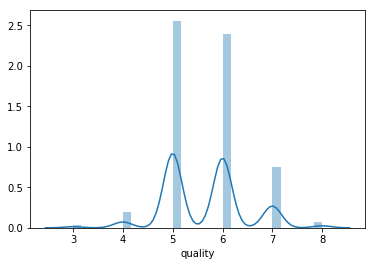

In [45]:
sns.distplot(red['quality'])

we can see the majority of the wine has a quality score of 5/6/7, which was in the middle tier. Although a logistic regression gives a very high accuracy score, we'd achieve a similar result just by giving every bottle a prediction of 1. intuitively, the 2 tier analysis (good vs bad) makes more sense. Alternativly, we can chaneg the tier structure.  

In [46]:
# 3 levels
tiers = []
for i in red['quality']:
    if i >= 1 and i <= 5:
        tiers.append('1')
    elif i ==6:
        tiers.append('2')
    elif i >= 7 and i <= 10:
        tiers.append('3')
red['tier'] = tiers

In [47]:
# running logistic regression on 3 tier review column 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['tier'],test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
log_model = LogisticRegression()

# fit the model with data
log_model.fit(X_train,y_train)

# predict on test set 
y_pred=log_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.80      0.71       148
           2       0.62      0.47      0.54       142
           3       0.44      0.40      0.42        30

    accuracy                           0.62       320
   macro avg       0.57      0.56      0.56       320
weighted avg       0.61      0.62      0.61       320



In [48]:
metrics.accuracy_score(y_test,y_pred)

0.61875

In [49]:
# save the scores for comparison 
#lr_report=metrics.classification_report(y_test, y_pred,output_dict=True)
#lr_f1=lr_report['weighted avg']['f1-score']
#lr_precision=lr_report['weighted avg']['precision']
#lr_recall=lr_report['weighted avg']['recall']

In [50]:
# using only the acidity and alchol columns
# running logistic regression on 3 tier review column 
X_train,X_test,y_train,y_test=train_test_split(red[['fixed acidity','volatile acidity','alcohol']],red['tier'],
                                               test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
simple_model = LogisticRegression()

# fit the model with data
simple_model.fit(X_train,y_train)

# predict on test set 
y_pred=simple_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.81      0.72       148
           2       0.60      0.54      0.57       142
           3       0.50      0.13      0.21        30

    accuracy                           0.62       320
   macro avg       0.58      0.49      0.50       320
weighted avg       0.61      0.62      0.60       320



In [51]:
metrics.accuracy_score(y_test,y_pred)

0.625

the f1 score for tier 3 drops significantly

## other models

In [52]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# using the AgeBins and FareBins data here
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['tier'],test_size=0.2,random_state=0)


C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting']
               #'VotingClassifier'
reports=[]
f1_score=[]
precision=[]
recall=[]
acc=[]

for model in models: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred,output_dict=True)
    reports.append(report)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    acc.append(metrics.accuracy_score(y_test,y_pred))
    
models_df=pd.DataFrame({'models':names, 'accuracy':acc,'f1_score':f1_score,'precision':precision, 'recall':recall})
models_df.round(3).sort_values(by='accuracy', ascending=False)

,models,accuracy,f1_score,precision,recall
10,Bagging Classifier,0.750,0.749,0.750,0.750
11,Ada Boosting,0.719,0.723,0.732,0.719
6,Random Forest,0.706,0.706,0.706,0.706
5,Decision Tree,0.697,0.699,0.702,0.697
3,SVC(RBF),0.678,0.673,0.675,0.678
4,SVC(polynomial),0.650,0.644,0.651,0.650
7,Naive Bayes,0.628,0.630,0.634,0.628
1,SVC(linear kernal),0.622,0.614,0.616,0.622
0,Logistic Regression,0.619,0.608,0.614,0.619
2,Linear SVC,0.612,0.599,0.605,0.612


## cross validation of the top 3 models

In [53]:
cv_models=[bc, ada,rf]
cv_names= ['Bagging Classifier', 'Ada Boosting', 'random forest']
acc_mean=[]
acc_high=[]
acc_low=[]

for model in cv_models:
    scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5)
    #scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    acc_mean.append(scores.mean())
    acc_high.append(scores.max())
    acc_low.append(scores.min())

cv_df=pd.DataFrame({'models':cv_names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

NameError: name 'cross_val_score' is not defined

## 2 tier analysis (good vs bad)

In [46]:
# break qualities into 2 levels
red['good?']=(red['quality']>=6)*1

In [47]:
# running logistic regression on 2 tier review column 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['good?'],test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
log_model2 = LogisticRegression()

# fit the model with data
log_model2.fit(X_train,y_train)

# predict on test set 
y_pred=log_model2.predict(X_test)


print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       148
           1       0.78      0.75      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [77]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['good?'],test_size=0.2,random_state=0)

C = 1.0  # SVM regularization parameter
svc2 = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc2 = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc2 = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc2 = svm.SVC(kernel='poly', C=C)
# decision tree
dt2 = DecisionTreeClassifier(random_state=0)
# random forest 
rf2 = RandomForestClassifier(random_state=0)
# naive bayes
nb2 = GaussianNB()
# perceptron 
per2 = Perceptron()
# knn 
knn2 = KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc2 = BaggingClassifier(base_estimator=dt2, random_state=0)
# Import AdaBoostClassifier
ada2 = AdaBoostClassifier(base_estimator=dt2, random_state=0,learning_rate=0.01,n_estimators=1)

models2 = [log_model2, svc2, lin_svc2, rbf_svc2, poly_svc2, dt2, rf2, nb2, per2, knn2, bc2, ada2]
names2 = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting']
reports2=[]
f1_score2=[]
precision2=[]
recall2=[]
accuracy=[]

for model in models2: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred,output_dict=True)
    reports2.append(report)
    f1_score2.append(report['weighted avg']['f1-score'])
    precision2.append(report['weighted avg']['precision'])
    recall2.append(report['weighted avg']['recall'])
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

In [78]:
models_df=pd.DataFrame({'models':names2, 'accuracy':accuracy,'f1_score':f1_score2,'precision':precision2, 'recall':recall2})

In [79]:
models_df.round(3).sort_values(by='accuracy', ascending=False)

,models,accuracy,f1_score,precision,recall
5,Decision Tree,0.791,0.791,0.791,0.791
11,Ada Boosting,0.791,0.791,0.792,0.791
6,Random Forest,0.784,0.785,0.785,0.784
10,Bagging Classifier,0.775,0.775,0.776,0.775
7,Naive Bayes,0.762,0.761,0.763,0.762
3,SVC(RBF),0.759,0.760,0.760,0.759
2,Linear SVC,0.753,0.753,0.754,0.753
0,Logistic Regression,0.750,0.750,0.751,0.750
1,SVC(linear kernal),0.738,0.738,0.741,0.738
4,SVC(polynomial),0.734,0.735,0.738,0.734


## anomaly detection 

In [ ]:
# consider quality below 5 to be anomalies
red['bad?']=(red['quality']<5)*1

In [ ]:
# running logistic regression on 2 tier review column 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['bad?'],test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
log_model3 = LogisticRegression()

# fit the model with data
log_model3.fit(X_train,y_train)

# predict on test set 
y_pred=log_model3.predict(X_test)


print(metrics.classification_report(y_test, y_pred))

### GridSearch

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
             'min_samples_split':[2,5,100,500],
             'min_samples_leaf':[1,2,5,10]}
searcher = GridSearchCV(dt2, parameters,cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy 0.7404222048475372


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
from sklearn.model_selection import GridSearchCV

# Instantiate the GridSearchCV object and run the search
parameters = {'learning_rate':[0.01,0.05,0.1, 0.5, 1, 2, 5, 10],
              'n_estimators':[1,5,10,25,50,75,100]}
searcher = GridSearchCV(ada, parameters,cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)


Best CV params {'learning_rate': 0.01, 'n_estimators': 10}
Best CV accuracy 0.72556684910086
